In [23]:
import numpy as np
import faiss
from matplotlib import pyplot

In [24]:
# create an inverted index
nlist = 1024
m = 8
k = 5
d = 64
coarse_quantizer = faiss.IndexFlatL2(d)
index = faiss.IndexIVFPQ(coarse_quantizer, d, nlist, m, 8)

In [25]:
# fill it in
xb = faiss.rand((10000, d), 1234)
index.train(xb)
index.add(xb)

In [26]:
# if there is a pre-transform, you can also use
# invlists = faiss.extract_index_ivf(index).invlists
invlists = index.invlists

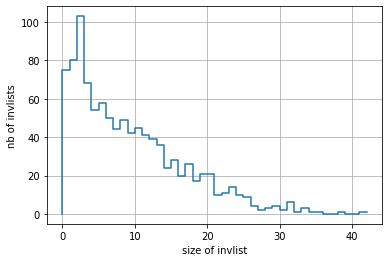

In [27]:
# invlist sizes histogram
bc = np.bincount([invlists.list_size(l) for l in range(invlists.nlist)])
pyplot.step(np.arange(bc.size), bc)
pyplot.xlabel('size of invlist')
pyplot.ylabel('nb of invlists')
pyplot.grid()

In [28]:
def get_invlist(invlists, l):
    """ returns the inverted lists content. 
    That the data is *not* copied: if the inverted index is deallocated or changes, accessing the array may crash.
    To avoid this, just clone the output arrays on output. """
    ls = invlists.list_size(l)
    list_ids = faiss.rev_swig_ptr(invlists.get_ids(l), ls)
    list_codes = faiss.rev_swig_ptr(invlists.get_codes(l), ls * invlists.code_size)
    return list_ids, list_codes

In [31]:
# get content of inverted list #123
list_ids, list_codes = get_invlist(invlists, 124)

In [32]:
# vector ids in the list
list_ids

array([ 375,  764, 1691, 1736, 2281, 2532, 2573, 2758, 3711, 3791, 6206,
       7364, 8009, 8828, 8849, 8865, 8988])

In [36]:
# check that vectors 375 and 764 are indeed quantized to list 124
coarse_quantizer.assign(xb[[375, 764]], 1)

array([[124],
       [124]])

In [37]:
# PQ codes stored in the inverted lists
list_codes.reshape(-1, invlists.code_size)

array([[135,  86, 175, 251, 122, 220,   0, 250],
       [ 22, 168, 238, 229, 218,  24,  93, 209],
       [226,  69,  61,  81, 162,  71, 218, 237],
       [130, 201,  27, 255,   8,  85, 177, 104],
       [ 53, 234, 190, 153, 109, 126,  54,  64],
       [124, 124,  34, 124, 205, 124, 124,  54],
       [ 92, 225, 123, 105, 152, 116,  26, 118],
       [100, 118, 163, 109, 160, 130, 109, 210],
       [114, 236,  59,  14, 183, 243, 186, 154],
       [160,  95,   1,  31,  23,  82, 232, 251],
       [ 98, 235,  85, 201,  87, 231, 139,   1],
       [ 42,  58,  54,  51,  13, 217,  23, 217],
       [240, 155,  77, 147,  29, 216, 216, 103],
       [150, 163,  70,  80, 187,  14, 202, 237],
       [ 84,  60,  29,  76, 107, 103, 180,  63],
       [ 58, 150,   5, 216, 136,   3,  74,  53],
       [ 54, 241,  31, 126, 195,  38,  63, 148]], dtype=uint8)